In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import pickle
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier # multi class calssification purpose
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arbazkhan971/allskillandnonskill")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/allskillandnonskill


In [4]:
skill = pd.read_csv("/kaggle/input/allskillandnonskill/skills.csv")
skill.head(20)

,Skill
0,supply chain engineering\n
1,bullet\n
2,commutations\n
3,pay equity\n
4,student retention\n
5,pulsar
6,hevacomp\n
7,travel insurance\n
8,payback\n
9,soaps\n


In [5]:

# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/resume-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/resume-dataset


In [6]:
df = pd.read_csv("/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
df.shape


(962, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [9]:
df.isnull().sum()

,0
Category,0
Resume,0


In [10]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [11]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


<ipython-input-12-abfb4d4c1d90>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Category'].value_counts(),palette='ocean')


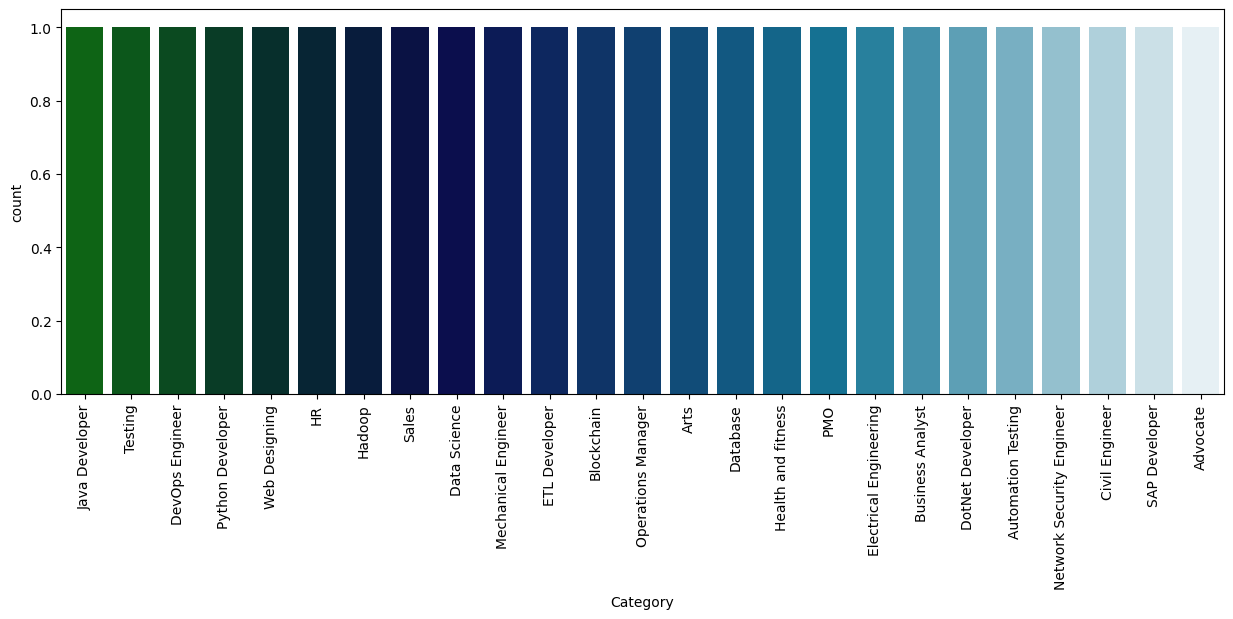

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'].value_counts(),palette='ocean')
plt.xticks(rotation=90)
# plt.legend()
plt.show()


In [13]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [14]:
category_count = df['Category'].value_counts()
labels = df['Category'].unique()

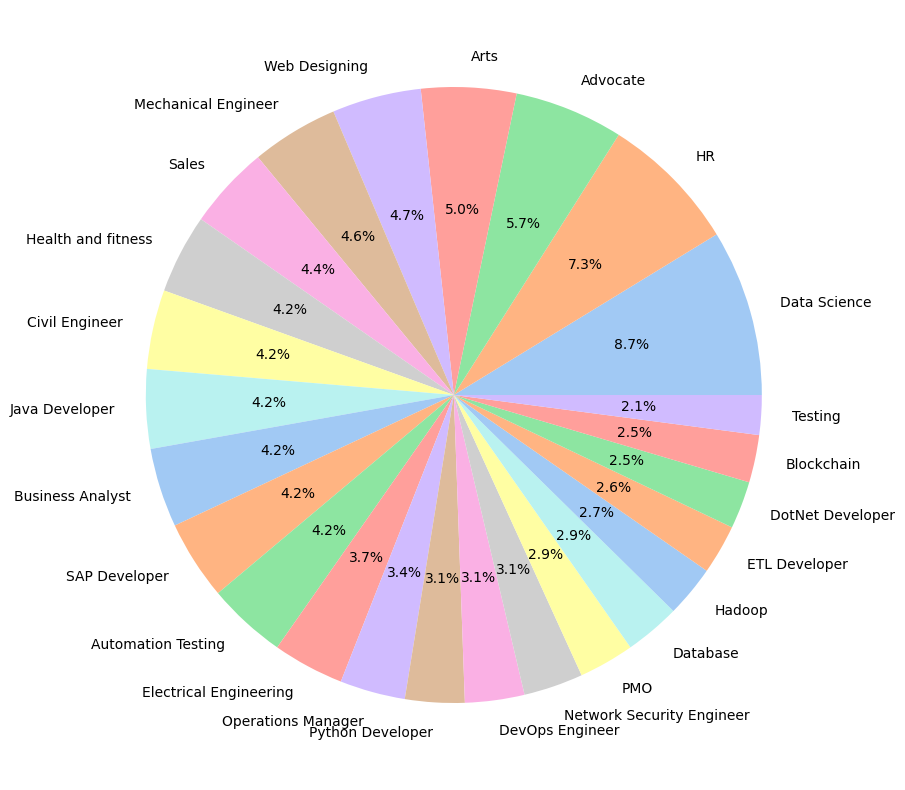

In [15]:
plt.figure(figsize=(25,10))
plt.pie(category_count,labels=labels,autopct='%1.1f%%',colors=sns.color_palette('pastel'))
# plt.title('Resume Category Distribution')
# plt.legend()
plt.show()

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [18]:
port_stem = PorterStemmer()
# removing the unwanted text from data
def stem_clean_resume(resume_text):
  stem_txt = re.sub(r'[^a-zA-Z]',' ',resume_text)
  stem_txt = re.sub(r'http\S+\s',' ',stem_txt)
  stem_txt = re.sub(r'RT|cc',' ',stem_txt)
  stem_txt = re.sub(r'#\S+\s',' ',stem_txt)
  stem_txt = re.sub(r'@\S+',' ',stem_txt)
  stem_txt = re.sub(r'[%s]'%re.escape(string.punctuation),' ',stem_txt)
  stem_txt = re.sub(r'\s+',' ',stem_txt)
  stem_txt = re.sub(r'[^\x00-\x7f]',' ',stem_txt)
  stem_txt = stem_txt.lower()
  stem_txt = stem_txt.split()
  stem_txt = [port_stem.stem(word) for word in stem_txt if word not in stopwords.words('english')]
  stem_txt = ' '.join(stem_txt)
  return stem_txt

In [19]:
# check function
stem_clean_resume("my #### #naruto webpageng https://sfg.grg @grjg.nvur  n jnf2")

'naruto webpageng sfg grg grjg nvur n jnf'

In [20]:
df['Resume'] = df['Resume'].apply(lambda x:stem_clean_resume(x))
# cleaning the resume

In [21]:
df['Resume'][0]

'skill program languag python panda numpi scipi scikit learn matplotlib sql java javascript jqueri machin learn regress svm na bay knn random forest decis tree boost techniqu cluster analysi word embed sentiment analysi natur languag process dimension reduct topic model lda nmf pca neural net databas visual mysql sqlserver cassandra hbase elasticsearch js dc js plotli kibana matplotlib ggplot tableau other regular express html css angular logstash kafka python flask git docker comput vision open cv understand deep learn educ detail data scienc assur associ data scienc assur associ ernst young llp skill detail javascript exprienc month jqueri exprienc month python exprienc monthscompani detail compani ernst young llp descript fraud investig disput servic assur technolog assist review tar technolog assist review assist eler review process run analyt gener report core member team help develop autom review platform tool scratch assist e discoveri domain tool implement predict code topic mo

In [22]:
# encoding the df['Category']
le = LabelEncoder()

In [23]:
df['Category'] = le.fit_transform(df['Category'])

In [24]:
df['Category'].unique()
# return numerical value not categeorical

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [25]:
# array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#        'Mechanical Engineer', 'Sales', 'Health and fitness',
#        'Civil Engineer', 'Java Developer', 'Business Analyst',
#        'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#        'Operations Manager', 'Python Developer', 'DevOps Engineer',
#        'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#        'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#       # dtype=object)
# CATEGEORICAL VALUES OF df['Categeory']

In [26]:
vectorizer = TfidfVectorizer(stop_words='english')

In [27]:
resume_txt = vectorizer.fit_transform(df['Resume'])
# resume_txt is the sparse matrix
# resume_txt is the input and category is the output

In [28]:
x_train , x_test , y_train , y_test = train_test_split(resume_txt , df['Category'],test_size=0.2,random_state=42)

In [30]:
print('x_train : ',x_train.shape)
print('x_test : ',x_test.shape)
print('y_train : ',y_train.shape)
print('y_test : ',y_test.shape)

x_train :  (769, 5080)
x_test :  (193, 5080)
y_train :  (769,)
y_test :  (193,)


In [31]:
# its a classification problem but a multiclassification not binary...........
classifier =OneVsRestClassifier( KNeighborsClassifier())

In [32]:
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [33]:
y_pred

array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [34]:
accuracy_score(y_test,y_pred)

0.9844559585492227

Prediction System



In [35]:
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(classifier,open('classifier.pkl','wb'))

In [36]:
my_resume = """ Aditi Singh
 Work  Experience
 LinkedInProfle :-  linkedin.com/in/aditi-singh-50b73328b
 Email:-   aditi08092003@gmail.com
 Contact No. :- +918319204594
 A  B.Tech Computer Science student with a solid foundation in web development and data
 structures . Adept at frontend development and project management with experience working
 on real-world projects . Eager to leverage problem-solving and technical skills to deliver
 innovative solutions.
 Frontend Developer
 Intern – CodeAlpha
 August 2024
September 2024
 Technical Skills
 Programming Languages :  Java (Core + Advance) , Python , C
    Web Technologies :  HTML , CSS , Bootstrap , JavaScript , Django ( Basics )
 Databases : MySQL , PostgreSQL
 Concepts :  Data Structures & Algorithms ( DSA  ) , Object - Oriented Programming (OOP ) ,
Database Management System ( DBMS )
 Projects
Hospital Management System ( Core Java ) :
Developed a Java-based hospital management  system for patient record management .
 Implemented patient registration , appointment  scheduling , and  doctor allocation .
 Portfolio Website :
Link : https://code-alpha-portfolio-gamma.vercel.app/
 E- Commerce Website ( Frontend Only ) :
 Designed the frontend of an e - commerce website using HTML , CSS , Bootstrap , and
JavaScript
Education
 Bachelor of  Technology Computer Science Engineering
 Shri Ram Institute Of Science & Technology ( 2022 - 26 )                             CPGA  :        8.63
Github Link :-  https://github.com/aditi-singh080106
 Higher Secondary ( MP Board )
 Guru  Gobind Singh Khalsa H.Sec  School ( 2020-21 )                                  Percentage : 87%
Secondary Education  ( MP Board )
 Guru  Gobind Singh Khalsa H.Sec  School ( 2018 - 19 )                                Percentage : 87%
 Certifications
 Coding Ninjas Slayground  Level 3
Cloud Computing by Microsoft .
 C by Infosys Springboard .
 Project Management Integration Foundation by PMI.
Java Intermediate by Sololearn
Python by Microsoft Learn Student
             Subject
             Database Management System.
            Object - Oriented Programming.
   Soft Skills
  Communication
  Teamwork
  Problem-solvin"""

In [37]:
classifier = pickle.load(open('classifier.pkl','rb'))
# clean the input resume
clean_resum = stem_clean_resume(my_resume)
# vectorize the clean resume
vector_input = vectorizer.transform([clean_resum])
# making the prediction using the loaded classifier
prediction_id = classifier.predict(vector_input)[0]

# Map category Id to category name
category_mapping = {
    15: 'Java Developer',
    23: "Testing",
    8 : 'DevOps Engineer',
    20: 'Python Developer',
    24: 'Web Designing',
    12: 'HR',
    13: 'Hadoop',
    3 : 'Blockchain',
    10: 'ETL Developer',
    18: 'Operations Manager',
    6 : 'Datascience' ,
    22: 'Sales',
    16: 'Mechanical Engineer',
    1 : 'Arts' ,
    7 : 'Database',
    11: 'Electrical Engineer',
    14: 'Health and Fitness',
    19: 'PMO' ,
    4 : 'Business Analyst' ,
    9 : 'DotNet Developer' ,
    2 : 'Automation Testing' ,
    17: 'Network Security Engineer' ,
    5 : 'Civil Engineer' ,
    0 : 'Advocate' ,
    21: 'SAP Developer'

}
category_name = category_mapping.get(prediction_id,"Unknown")
print("Predicted Category : ",category_name)
print(prediction_id)

Predicted Category :  Web Designing
24
